In [38]:
# VERİ SETİ

# number_of_pregnancy Number of times pregnant.
# glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
# blood_pressure Diastolic blood pressure (mm Hg).
# skin_thickness Triceps skinfold thickness (mm).
# insulin 2-Hour serum insulin (mu U/ml).
# bmi  Body mass index (weight in kg/(height in m)^2).
# diabetes_pedigree Diabetes pedigree function.
# age  Age (years).
# outcome  Class variable (0 or 1).

In [39]:
file_name='veri-seti.txt';
column_names = ['number_of_pregnancy', 'glucose', 'blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree','age','outcome']


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mstats



def fn_calc_mean(dfx,col_name):
    df_tmp = dfx[dfx[col_name]>0]
    return df_tmp[col_name].mean()

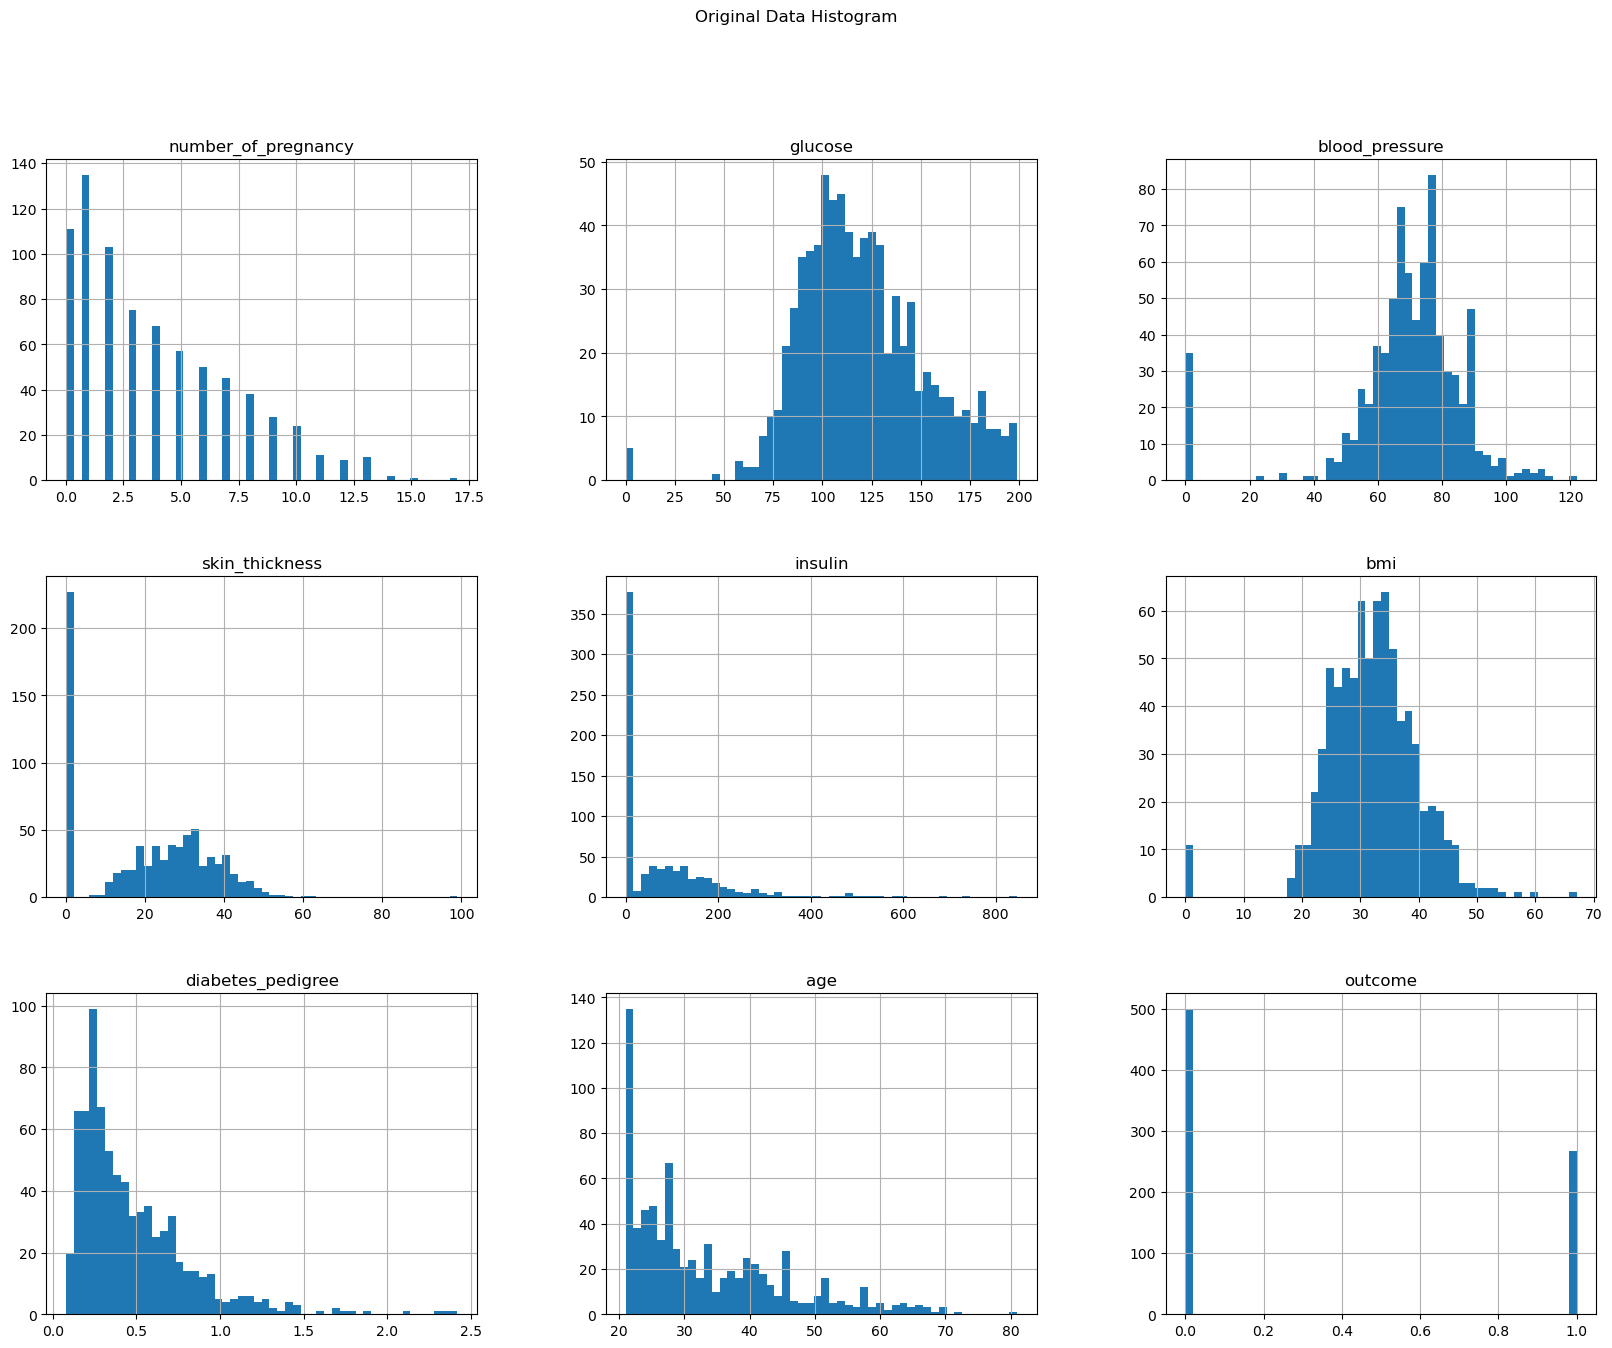

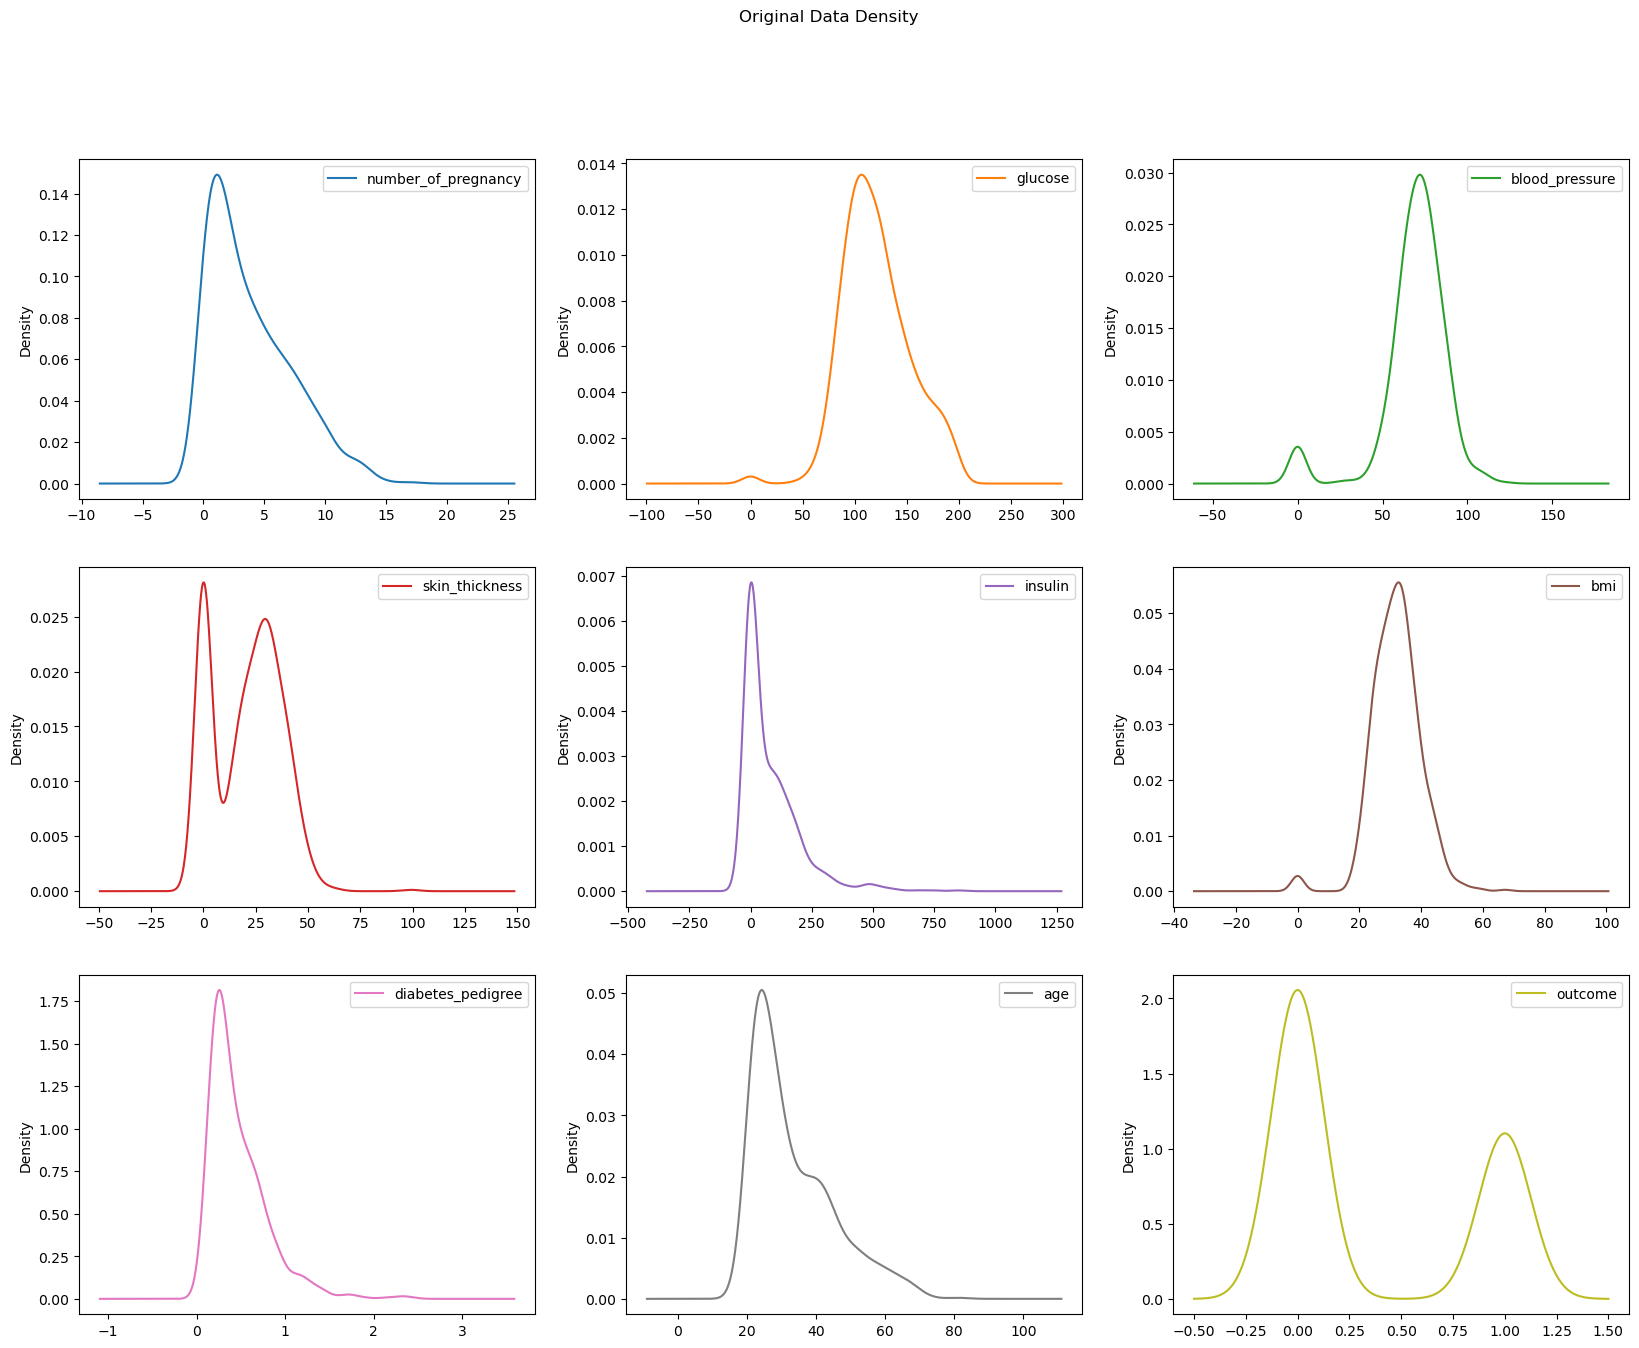

In [40]:

df = pd.read_csv(file_name,sep='\t',names=column_names);

df2 = df;
# Histogram
df2.hist(bins=50, figsize=(20, 15))
plt.suptitle("Original Data Histogram")
plt.show()

df2.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False,title="Original Data Density")
plt.show()

In [41]:

df_normal = df2[df2['outcome']==0]
df_diabetes = df2[df2['outcome']==1]

naValues = ["glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree" ]
for i in naValues:
    ortalama = fn_calc_mean(df_normal, i)
    ortalama2 = fn_calc_mean(df_diabetes, i)
    if (i=="bmi") | (i=="diabetes_pedigree"):
        df2.loc[(df2[i] == 0) & (df2['outcome']==0), i] = ortalama
        df2.loc[(df2[i] == 0) & (df2['outcome']==1), i] = ortalama2
    else:
        df2.loc[(df2[i] == 0) & (df2['outcome']==0), i] = int(ortalama)
        df2.loc[(df2[i] == 0) & (df2['outcome']==1), i] = int(ortalama2)
    
    df2[i] = mstats.winsorize(df2[i], limits=[0.05, 0.05])

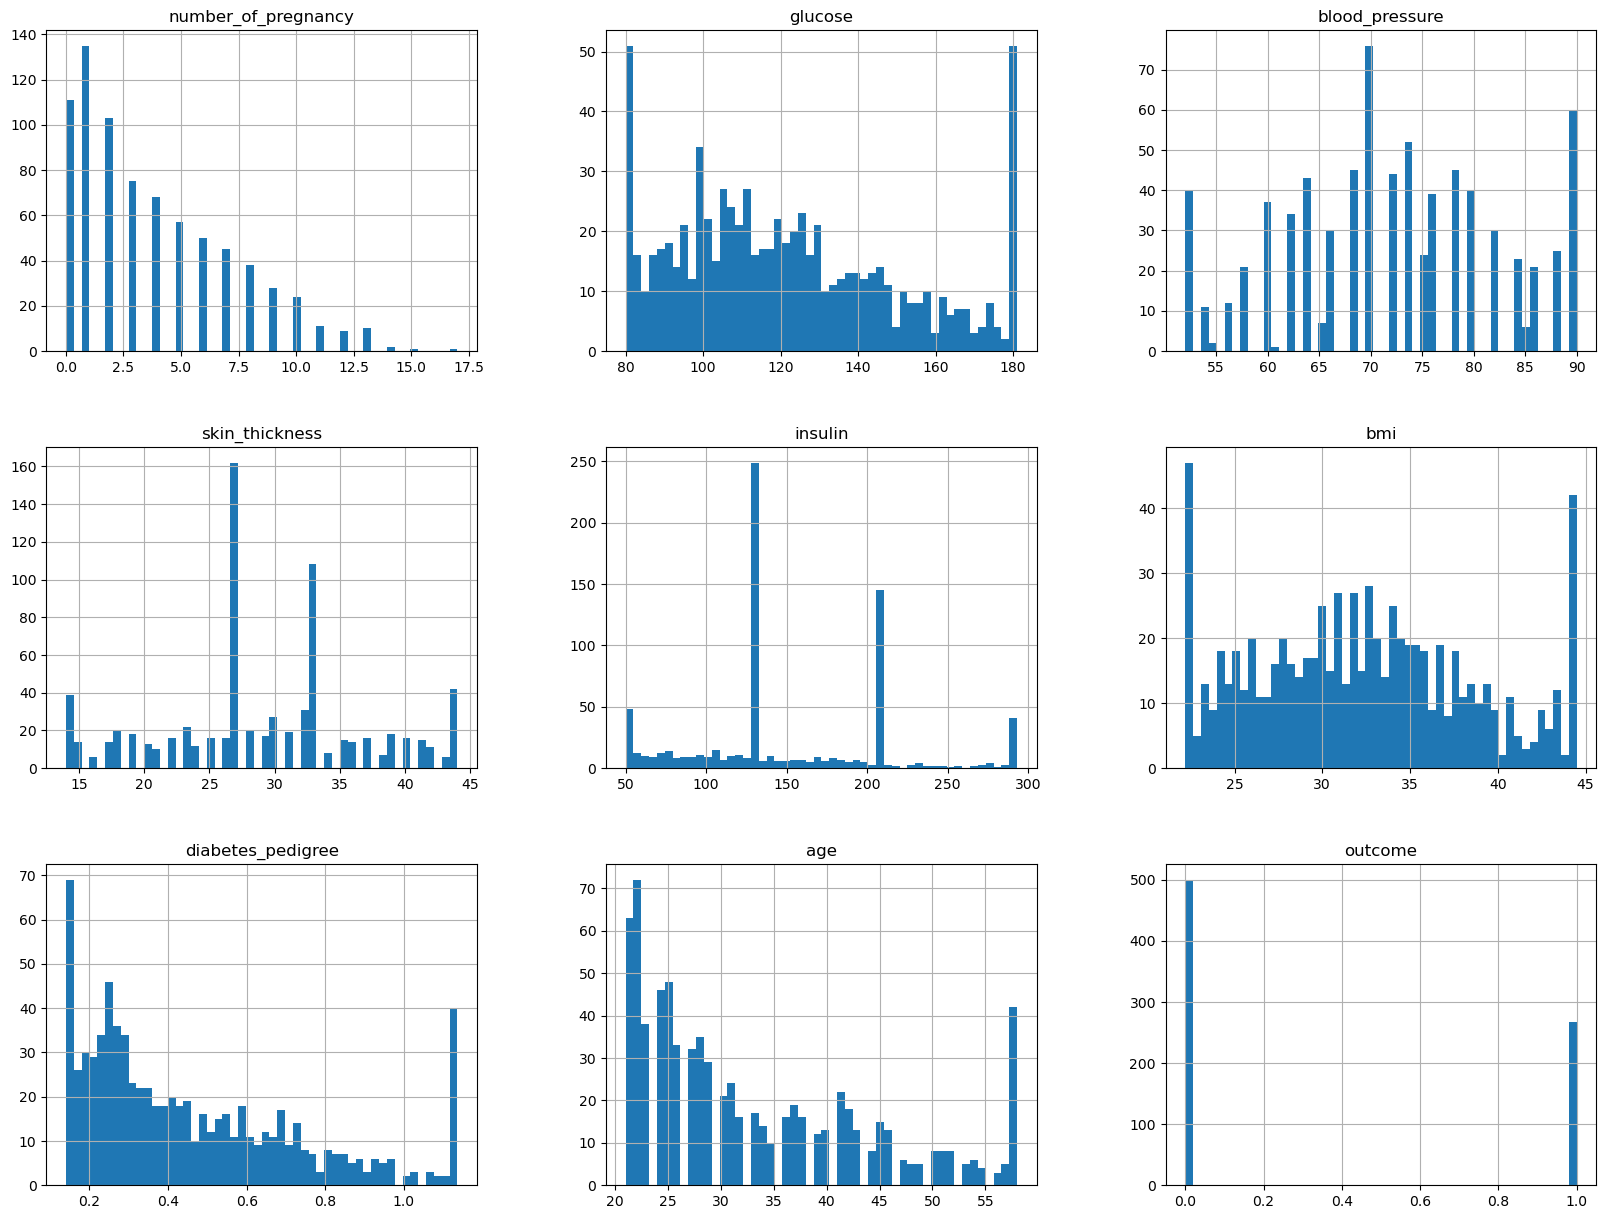

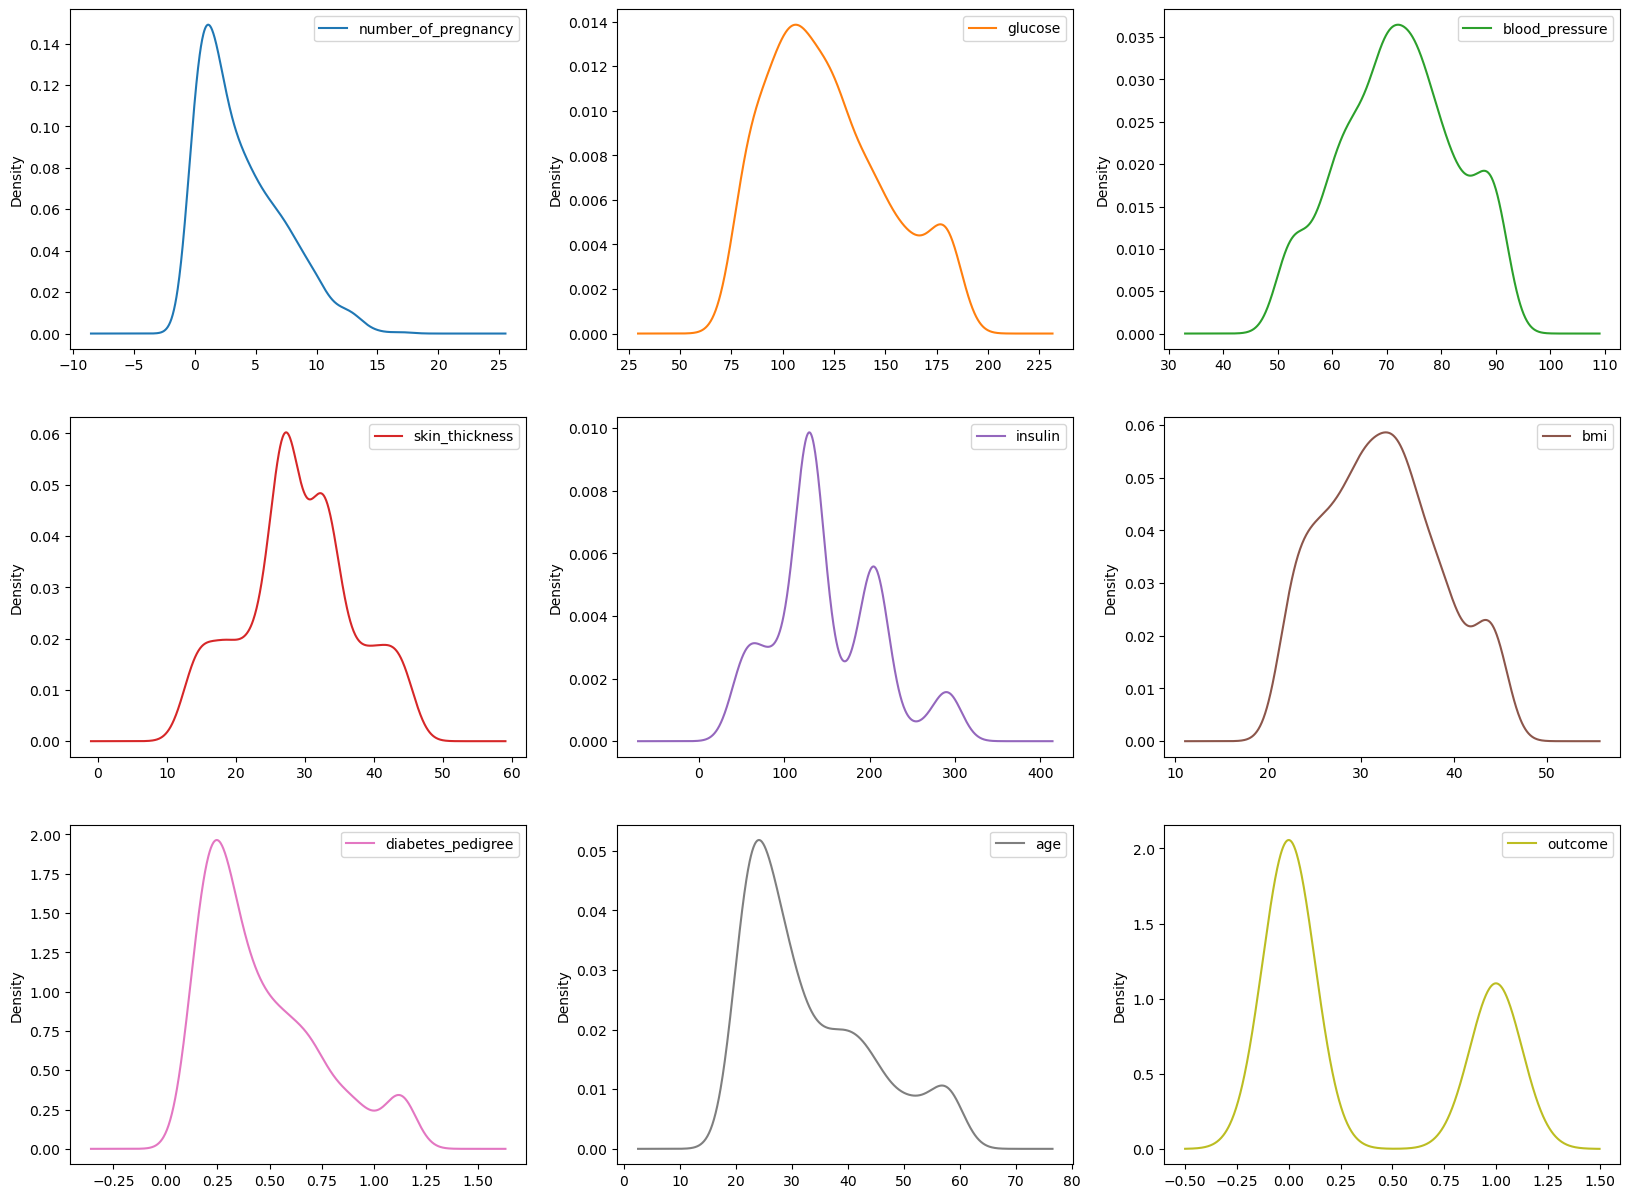

In [42]:

# Histogram
df2.hist(bins=50, figsize=(20, 15))
plt.show()

df2.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

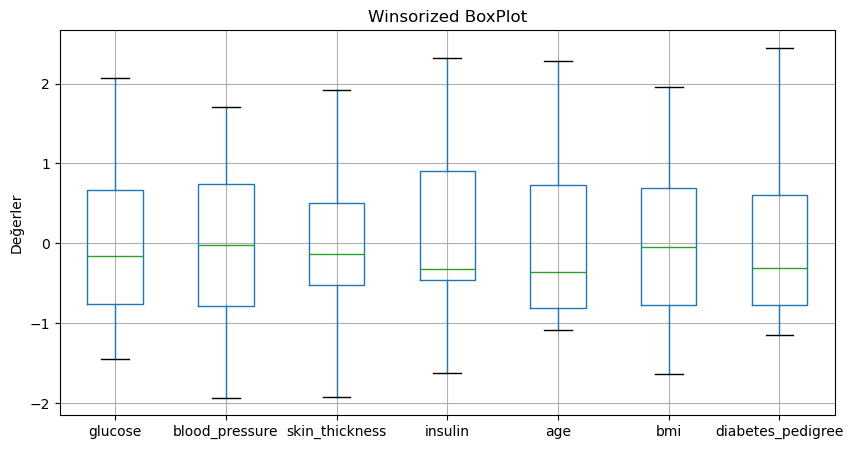

In [43]:
scaler = StandardScaler()

# DataFrame'i ölçeklendirme
df_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

fig = plt.figure(figsize =(10, 5))

# 'KolonAdı' isimli kolona göre boxplot çizelim
df_normalized.boxplot(column=["glucose", "blood_pressure", "skin_thickness", "insulin", "age","bmi","diabetes_pedigree" ])

# Grafik başlığı ekleyelim
plt.title('Winsorized BoxPlot')

# Y ekseni etiketi
plt.ylabel('Değerler')

# Görseli gösterelim
plt.show()

In [44]:
y = df2.outcome
X = df_normalized.drop('outcome',axis=1)

In [45]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

[[ 0.29480948  0.4133464   0.35452084  0.39198531  0.40543323  0.38017187
   0.12688588  0.37133253]
 [ 0.56295315 -0.05149587  0.11779228 -0.3525642  -0.12080359 -0.45032923
  -0.20325884  0.53249537]]
explained variance ratio (first two components): [0.32015391 0.18074246]


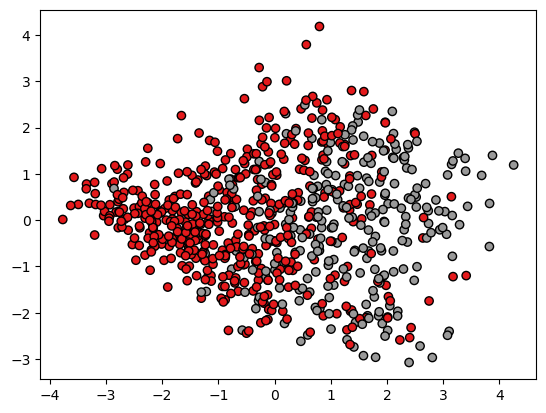

In [46]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

print(pca.components_)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

fig1, ax1 = plt.subplots()
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

plt.show()


# LDA

In [47]:

lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)

print(lda.scalings_)

col_names = X.columns;
print(X.columns);

lda_components = lda.scalings_.flatten()
for i,component in enumerate(lda_components):
    col_name = col_names[i]
    print(f"{col_name} : {component}")


[[-0.22221841]
 [-0.53172451]
 [ 0.0258081 ]
 [-0.22374257]
 [-0.59505442]
 [-0.18189   ]
 [-0.2062147 ]
 [-0.07961655]]
Index(['number_of_pregnancy', 'glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'age'],
      dtype='object')
number_of_pregnancy : -0.22221841064563622
glucose : -0.531724508913997
blood_pressure : 0.025808101867862046
skin_thickness : -0.22374256706090323
insulin : -0.5950544162346818
bmi : -0.18189000142898665
diabetes_pedigree : -0.20621470319312019
age : -0.07961654964755074


In [48]:

#### Train Test split yapalım
### Burada PCA analizleri için de bir split işlemi yapıyoruz

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents, y, test_size=0.3, random_state=42, stratify=y)




In [49]:

from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score,classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns

# LINEAR REGRESSION


Linear Regression Accuracy: 0.8138528138528138
Linear Regression Sensitivity: 0.7037037037037037
Linear Regression Precision: 0.75
Linear Regression F1 Score: 0.7261146496815287


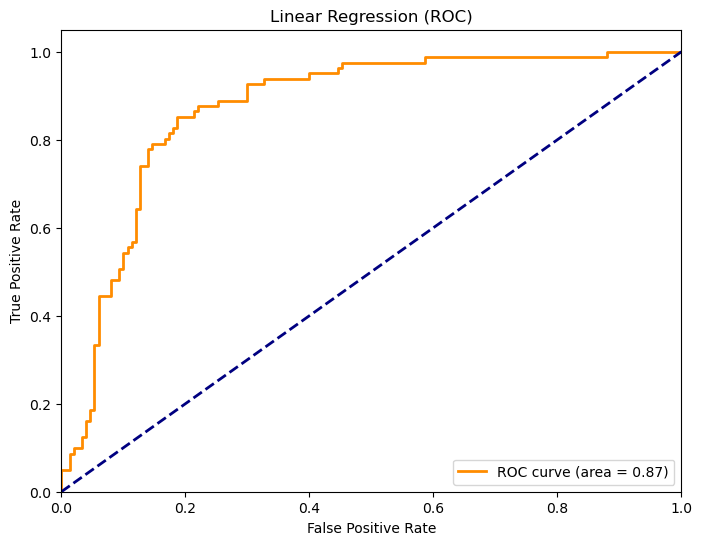

Lineer Regresyon Confusion Matrix:
 [[131  19]
 [ 24  57]]


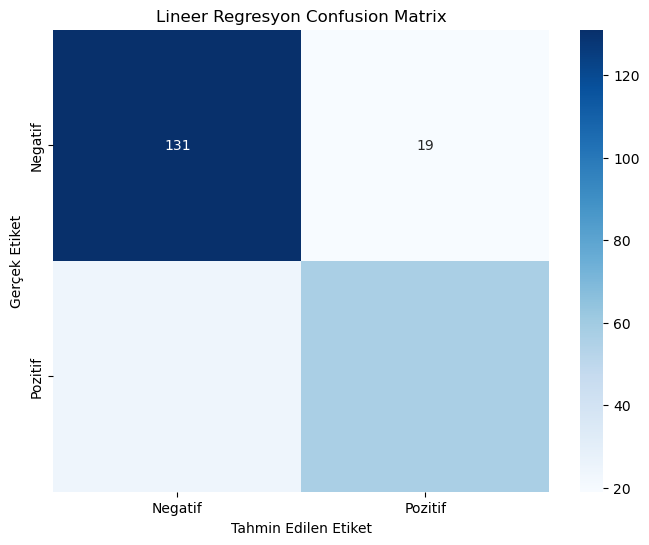

In [50]:

from sklearn.linear_model import LinearRegression, LogisticRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma (sürekli değerler olarak)
y_pred_continuous = model.predict(X_test)

# Tahmin edilen sürekli değerleri ikili sınıflara dönüştürme
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred_continuous]


# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Linear Regression Accuracy:", accuracy)

# Hassasiyet (Sensitivity) or Recall
sensitivity = recall_score(y_test, y_pred_binary, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("Linear Regression Sensitivity:", sensitivity)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred_binary, pos_label=1)
print("Linear Regression Precision:", precision)

# F1-Skor
f1 = f1_score(y_test, y_pred_binary, pos_label=1)
print("Linear Regression F1 Score:", f1)


# Modelin test seti üzerindeki tahminlerini al
y_scores = model.predict(X_test)

# Gerçek pozitif oranı (TPR) ve yanlış pozitif oranı (FPR) hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesapla
roc_auc = auc(fpr, tpr)

# ROC Eğrisi çizdir
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression (ROC)')
plt.legend(loc="lower right")
plt.show()



# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Lineer Regresyon Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Lineer Regresyon Confusion Matrix')
plt.show()

# PCA LINEAR REGRESSION

PCA Accuracy: 0.7748917748917749
PCA Sensitivity: 0.654320987654321
PCA Precision: 0.6883116883116883
PCA F1 Score: 0.6708860759493671


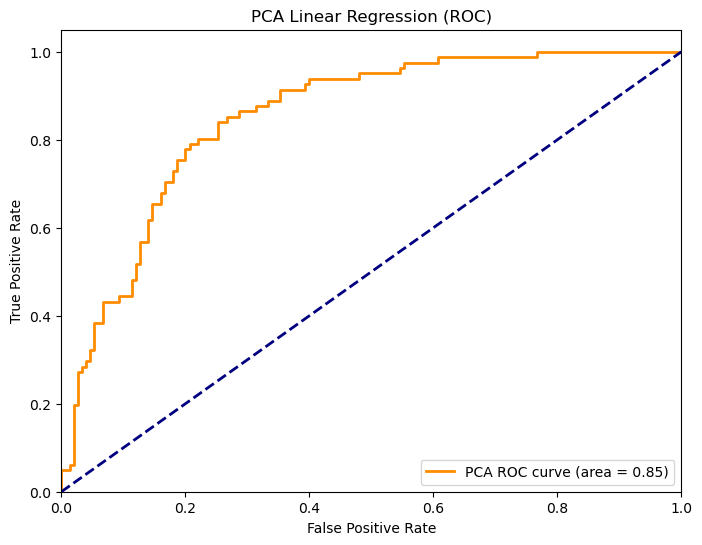

PCA Lineer Regresyon Confusion Matrix:
 [[126  24]
 [ 28  53]]


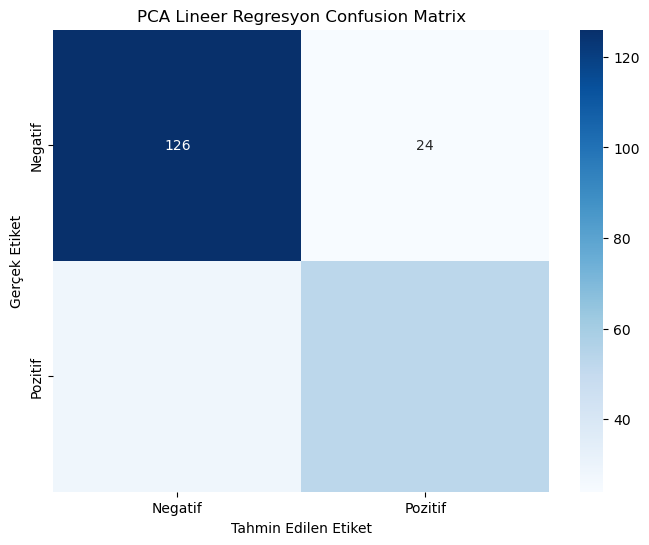

In [52]:


########### PCA LINEAR REGRESSION

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Test seti üzerinde tahmin yapma (sürekli değerler olarak)
y_pred_continuous_pca = model_pca.predict(X_test_pca)

# Tahmin edilen sürekli değerleri ikili sınıflara dönüştürme
y_pred_binary_pca = [1 if x >= 0.5 else 0 for x in y_pred_continuous_pca]


# Doğruluk (Accuracy)
accuracy_pca = accuracy_score(y_test_pca, y_pred_binary_pca)
print("PCA Accuracy:", accuracy_pca)

# Hassasiyet (Sensitivity) or Recall
sensitivity_pca = recall_score(y_test_pca, y_pred_binary_pca, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("PCA Sensitivity:", sensitivity_pca)

# Kesinlik (Precision)
precision_pca = precision_score(y_test_pca, y_pred_binary_pca, pos_label=1)
print("PCA Precision:", precision_pca)

# F1-Skor
f1_pca = f1_score(y_test_pca, y_pred_binary_pca, pos_label=1)
print("PCA F1 Score:", f1_pca)


# Modelin test seti üzerindeki tahminlerini al
y_scores_pca = model_pca.predict(X_test_pca)

# Gerçek pozitif oranı (TPR) ve yanlış pozitif oranı (FPR) hesapla
fpr, tpr, thresholds = roc_curve(y_test_pca, y_scores_pca)

# AUC değerini hesapla
roc_auc = auc(fpr, tpr)

# ROC Eğrisi çizdir
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PCA ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA Linear Regression (ROC)')
plt.legend(loc="lower right")
plt.show()



# Confusion Matrix hesaplama
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_binary_pca)
print("PCA Lineer Regresyon Confusion Matrix:\n", conf_matrix_pca)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('PCA Lineer Regresyon Confusion Matrix')
plt.show()


# LOGISTIC REGRESSION

Lojistik Regresyon Confusion Matrix:
 [[131  19]
 [ 20  61]]
Lojistik Regresyon Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.76      0.75      0.76        81

    accuracy                           0.83       231
   macro avg       0.82      0.81      0.81       231
weighted avg       0.83      0.83      0.83       231



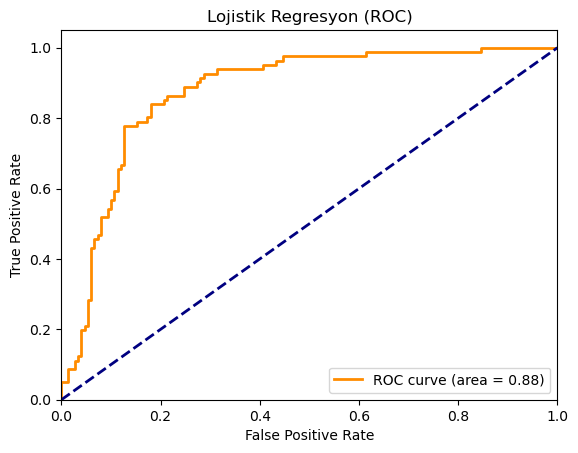

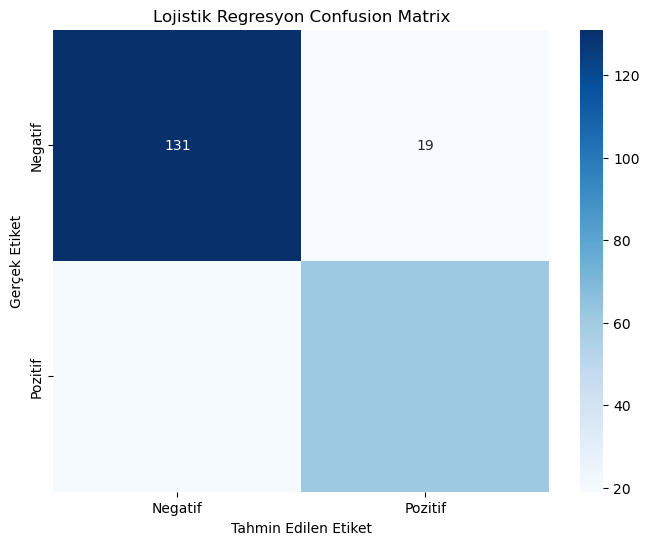

In [53]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılıklar

# Başarı metrikleri
print("Lojistik Regresyon Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Lojistik Regresyon Classification Report:\n", classification_report(y_test, y_pred))

# ROC Eğrisi ve AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC Eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lojistik Regresyon (ROC)')
plt.legend(loc="lower right")
plt.show()


# Confusion matrix çiz
conf_matrix_lojistik = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lojistik, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Lojistik Regresyon Confusion Matrix')
plt.show()

# PCA LOGISTIC REGRESSION

PCA Lojistik Regresyon Confusion Matrix:
 [[126  24]
 [ 26  55]]
PCA Lojistik Regresyon Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       150
           1       0.70      0.68      0.69        81

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



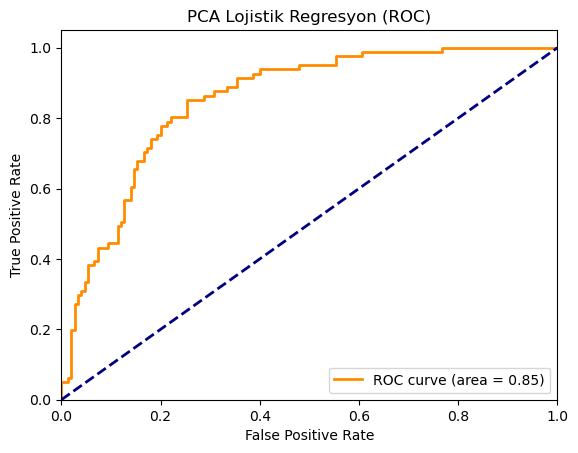

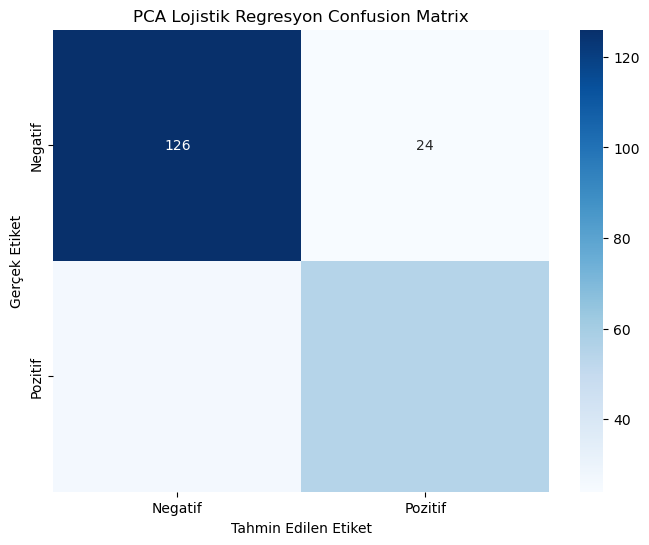

In [54]:

model_pca  = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)
y_prob_pca = model_pca.predict_proba(X_test_pca)[:, 1]  # Sınıf 1 için olasılıklar

# Başarı metrikleri
print("PCA Lojistik Regresyon Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("PCA Lojistik Regresyon Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

# ROC Eğrisi ve AUC
fpr, tpr, _ = roc_curve(y_test_pca, y_prob_pca)
roc_auc = auc(fpr, tpr)

# ROC Eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA Lojistik Regresyon (ROC)')
plt.legend(loc="lower right")
plt.show()


# Confusion matrix çiz
conf_matrix_lojistik_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lojistik_pca, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('PCA Lojistik Regresyon Confusion Matrix')
plt.show()

# KARAR AĞAÇLARI

[Text(0.39285714285714285, 0.9, 'x[4] <= -0.131\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(0.14285714285714285, 0.7, 'x[1] <= 0.185\ngini = 0.171\nsamples = 329\nvalue = [298, 31]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.088\nsamples = 260\nvalue = [248, 12]'),
 Text(0.21428571428571427, 0.5, 'x[3] <= 0.381\ngini = 0.399\nsamples = 69\nvalue = [50, 19]'),
 Text(0.14285714285714285, 0.3, 'x[3] <= -0.323\ngini = 0.269\nsamples = 50\nvalue = [42, 8]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.1\nsamples = 38\nvalue = [36, 2]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.6428571428571429, 0.7, 'x[4] <= 0.9\ngini = 0.375\nsamples = 208\nvalue = [52, 156]'),
 Text(0.5, 0.5, 'x[1] <= 0.516\ngini = 0.5\nsamples = 63\nvalue = [32, 31]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.394\nsamples = 37\nvalue = [27, 10]'),
 Text(0.5714285714285714, 0.3, 'x[5] <=

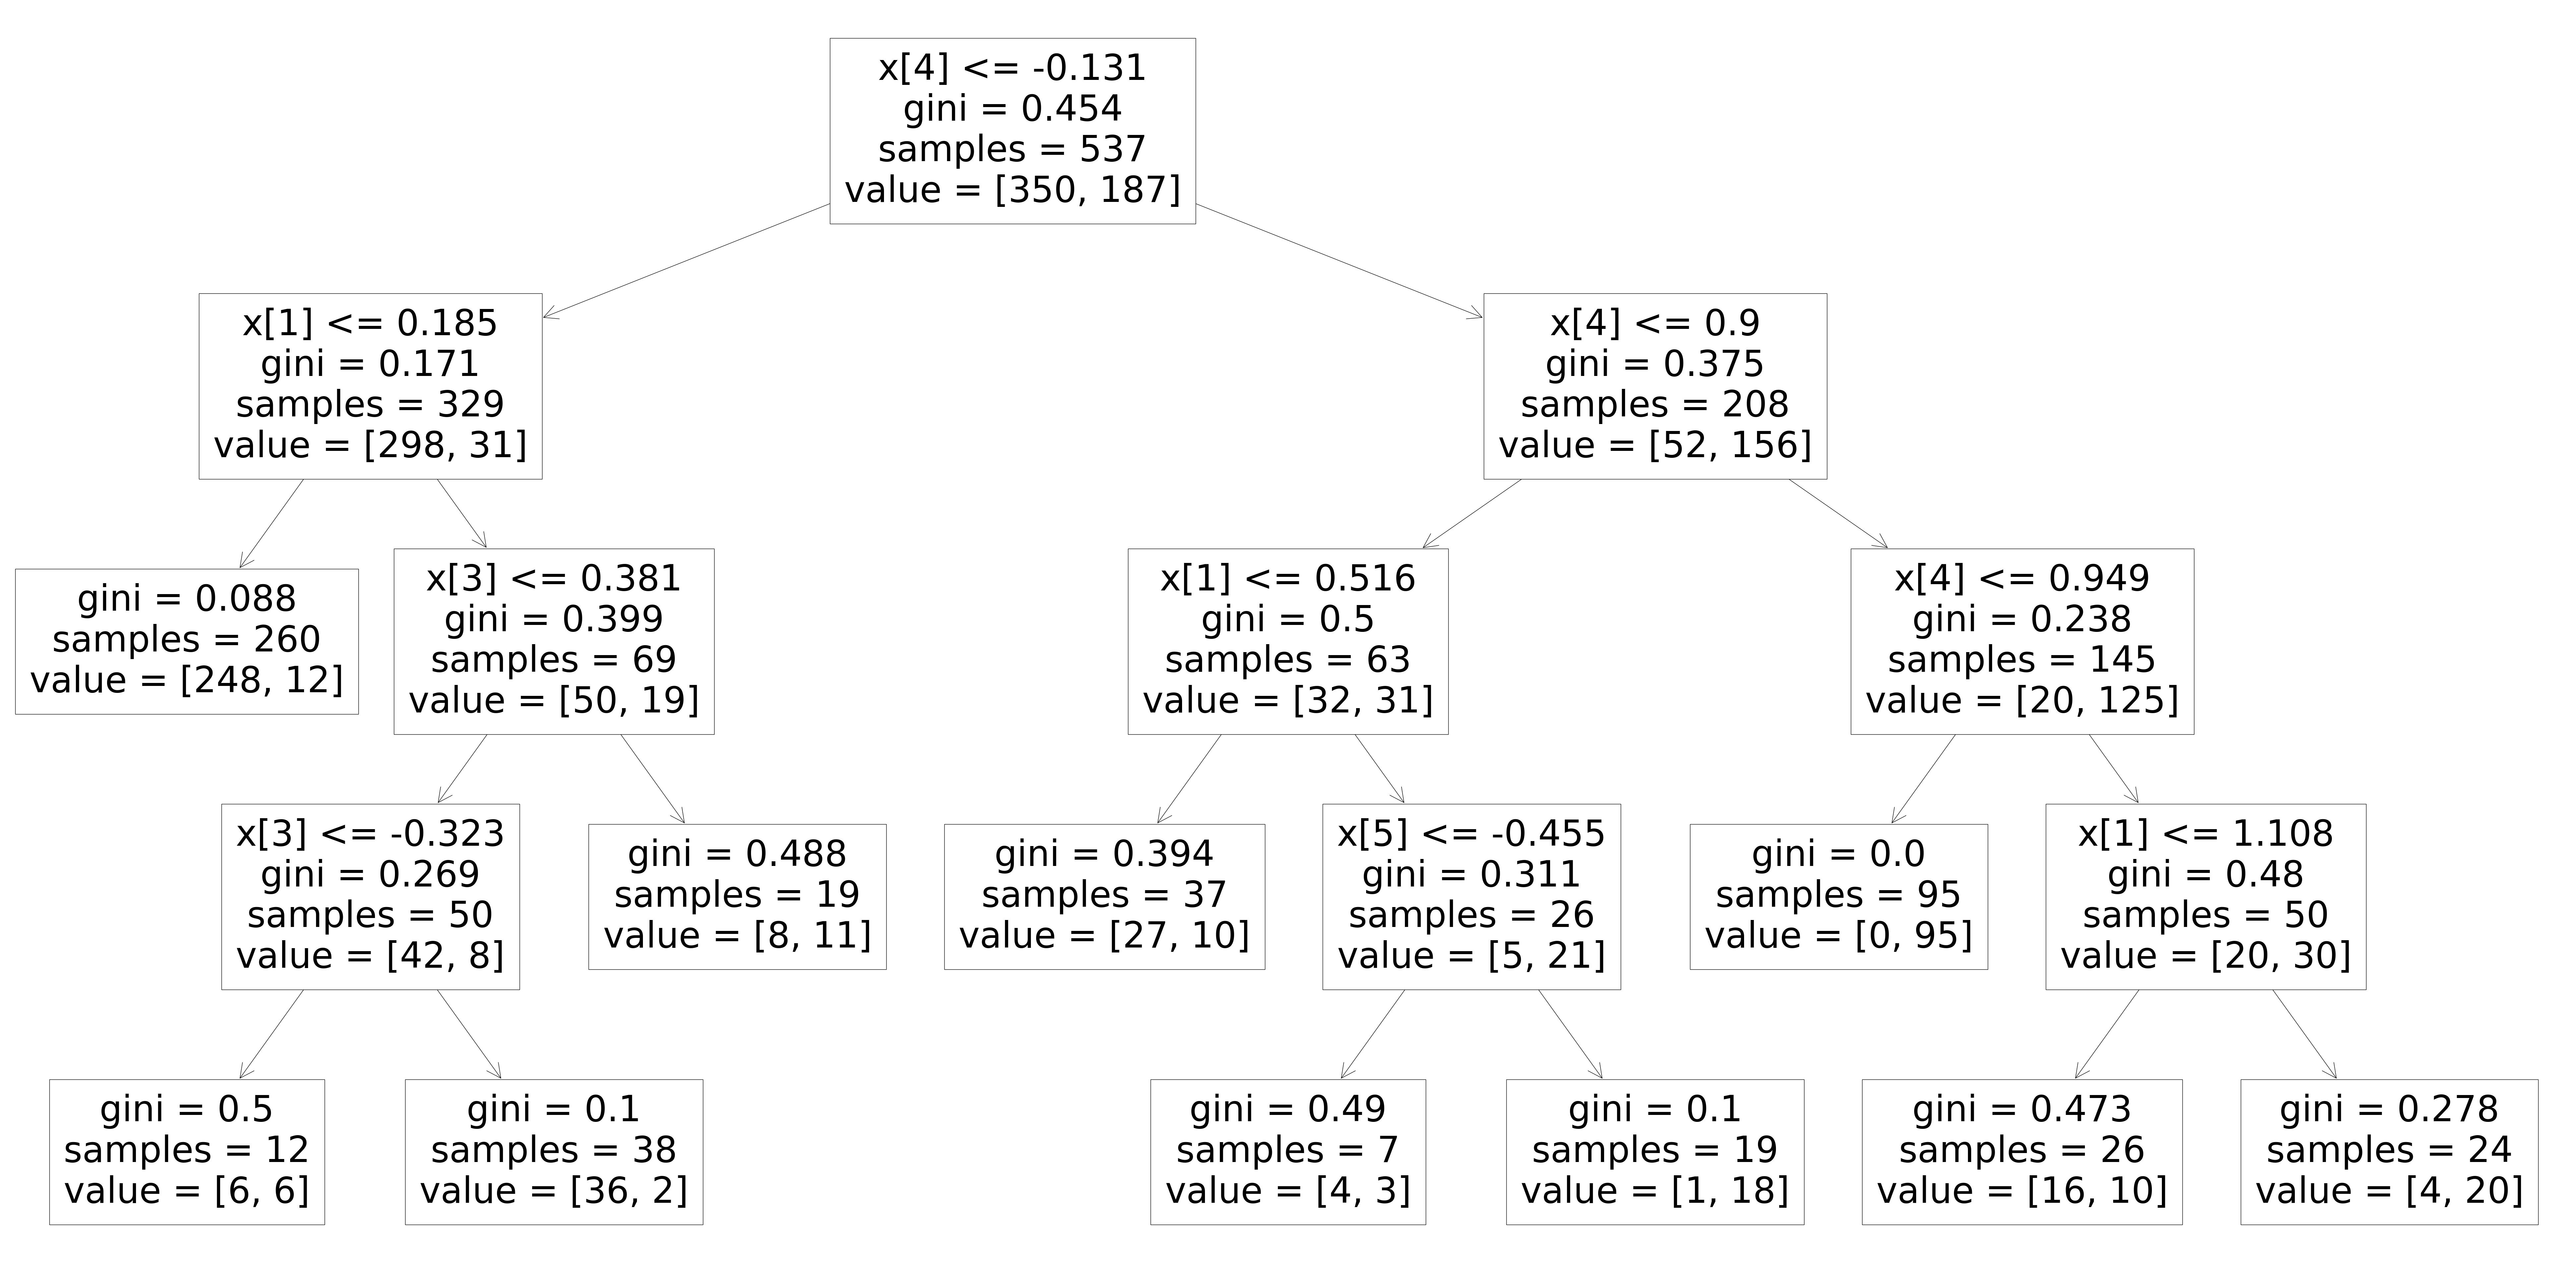

In [55]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, 
    min_samples_split=10, 
    min_samples_leaf=4,
    max_leaf_nodes=10
    )
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(100,50))  # Figür boyutunu büyüt
tree.plot_tree(clf)

Karar Ağacı Accuracy: 0.8528138528138528
Karar Ağacı Sensitivity: 0.7160493827160493
Karar Ağacı Precision: 0.8405797101449275
Karar Ağacı F1 Score: 0.7733333333333333
Karar Ağacı Confusion Matrix:
 [[139  11]
 [ 23  58]]


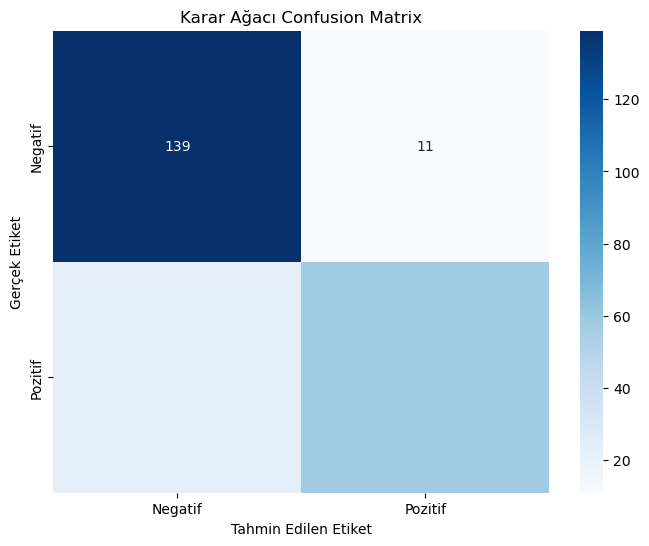

Karar Ağacı ROC AUC: 0.9179012345679012


<Figure size 640x480 with 0 Axes>

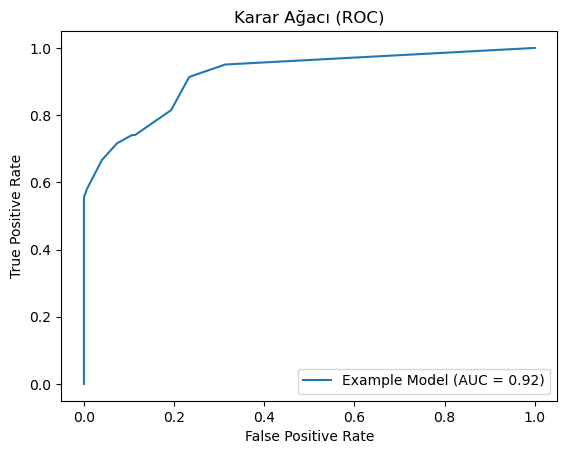

In [56]:
# METRİKLER

# Test seti üzerinde tahmin yapma
y_pred = clf.predict(X_test)


# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Karar Ağacı Accuracy:", accuracy)

# Hassasiyet (Sensitivity) or Recall
sensitivity = recall_score(y_test, y_pred, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("Karar Ağacı Sensitivity:", sensitivity)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred, pos_label=1)
print("Karar Ağacı Precision:", precision)

# F1-Skor
f1 = f1_score(y_test, y_pred, pos_label=1)
print("Karar Ağacı F1 Score:", f1)

# Özgüllük (Specificity)
# tn, fp, fn, tp = clf.ravel()
# specificity = tn / (tn + fp)
# print("Specificity:", specificity)


# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("Karar Ağacı Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Karar Ağacı Confusion Matrix')
plt.show()

######### ROC Eğrisi


# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores = clf.predict_proba(X_test)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("Karar Ağacı ROC AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example Model').plot()
plt.title('Karar Ağacı (ROC)')
plt.show()

# PCA KARAR AĞAÇLARI

[Text(0.39705882352941174, 0.9, 'x[0] <= 0.585\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(0.11764705882352941, 0.7, 'x[0] <= -0.769\ngini = 0.249\nsamples = 330\nvalue = [282, 48]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.17647058823529413, 0.5, 'x[1] <= 0.9\ngini = 0.391\nsamples = 154\nvalue = [113, 41]'),
 Text(0.11764705882352941, 0.3, 'gini = 0.438\nsamples = 114\nvalue = [77, 37]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.6764705882352942, 0.7, 'x[0] <= 1.626\ngini = 0.441\nsamples = 207\nvalue = [68, 139]'),
 Text(0.47058823529411764, 0.5, 'x[1] <= 1.284\ngini = 0.499\nsamples = 116\nvalue = [55, 61]'),
 Text(0.35294117647058826, 0.3, 'x[0] <= 1.225\ngini = 0.467\nsamples = 86\nvalue = [32, 54]'),
 Text(0.29411764705882354, 0.1, 'gini = 0.404\nsamples = 57\nvalue = [16, 41]'),
 Text(0.4117647058823529, 0.1, 'gini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.588

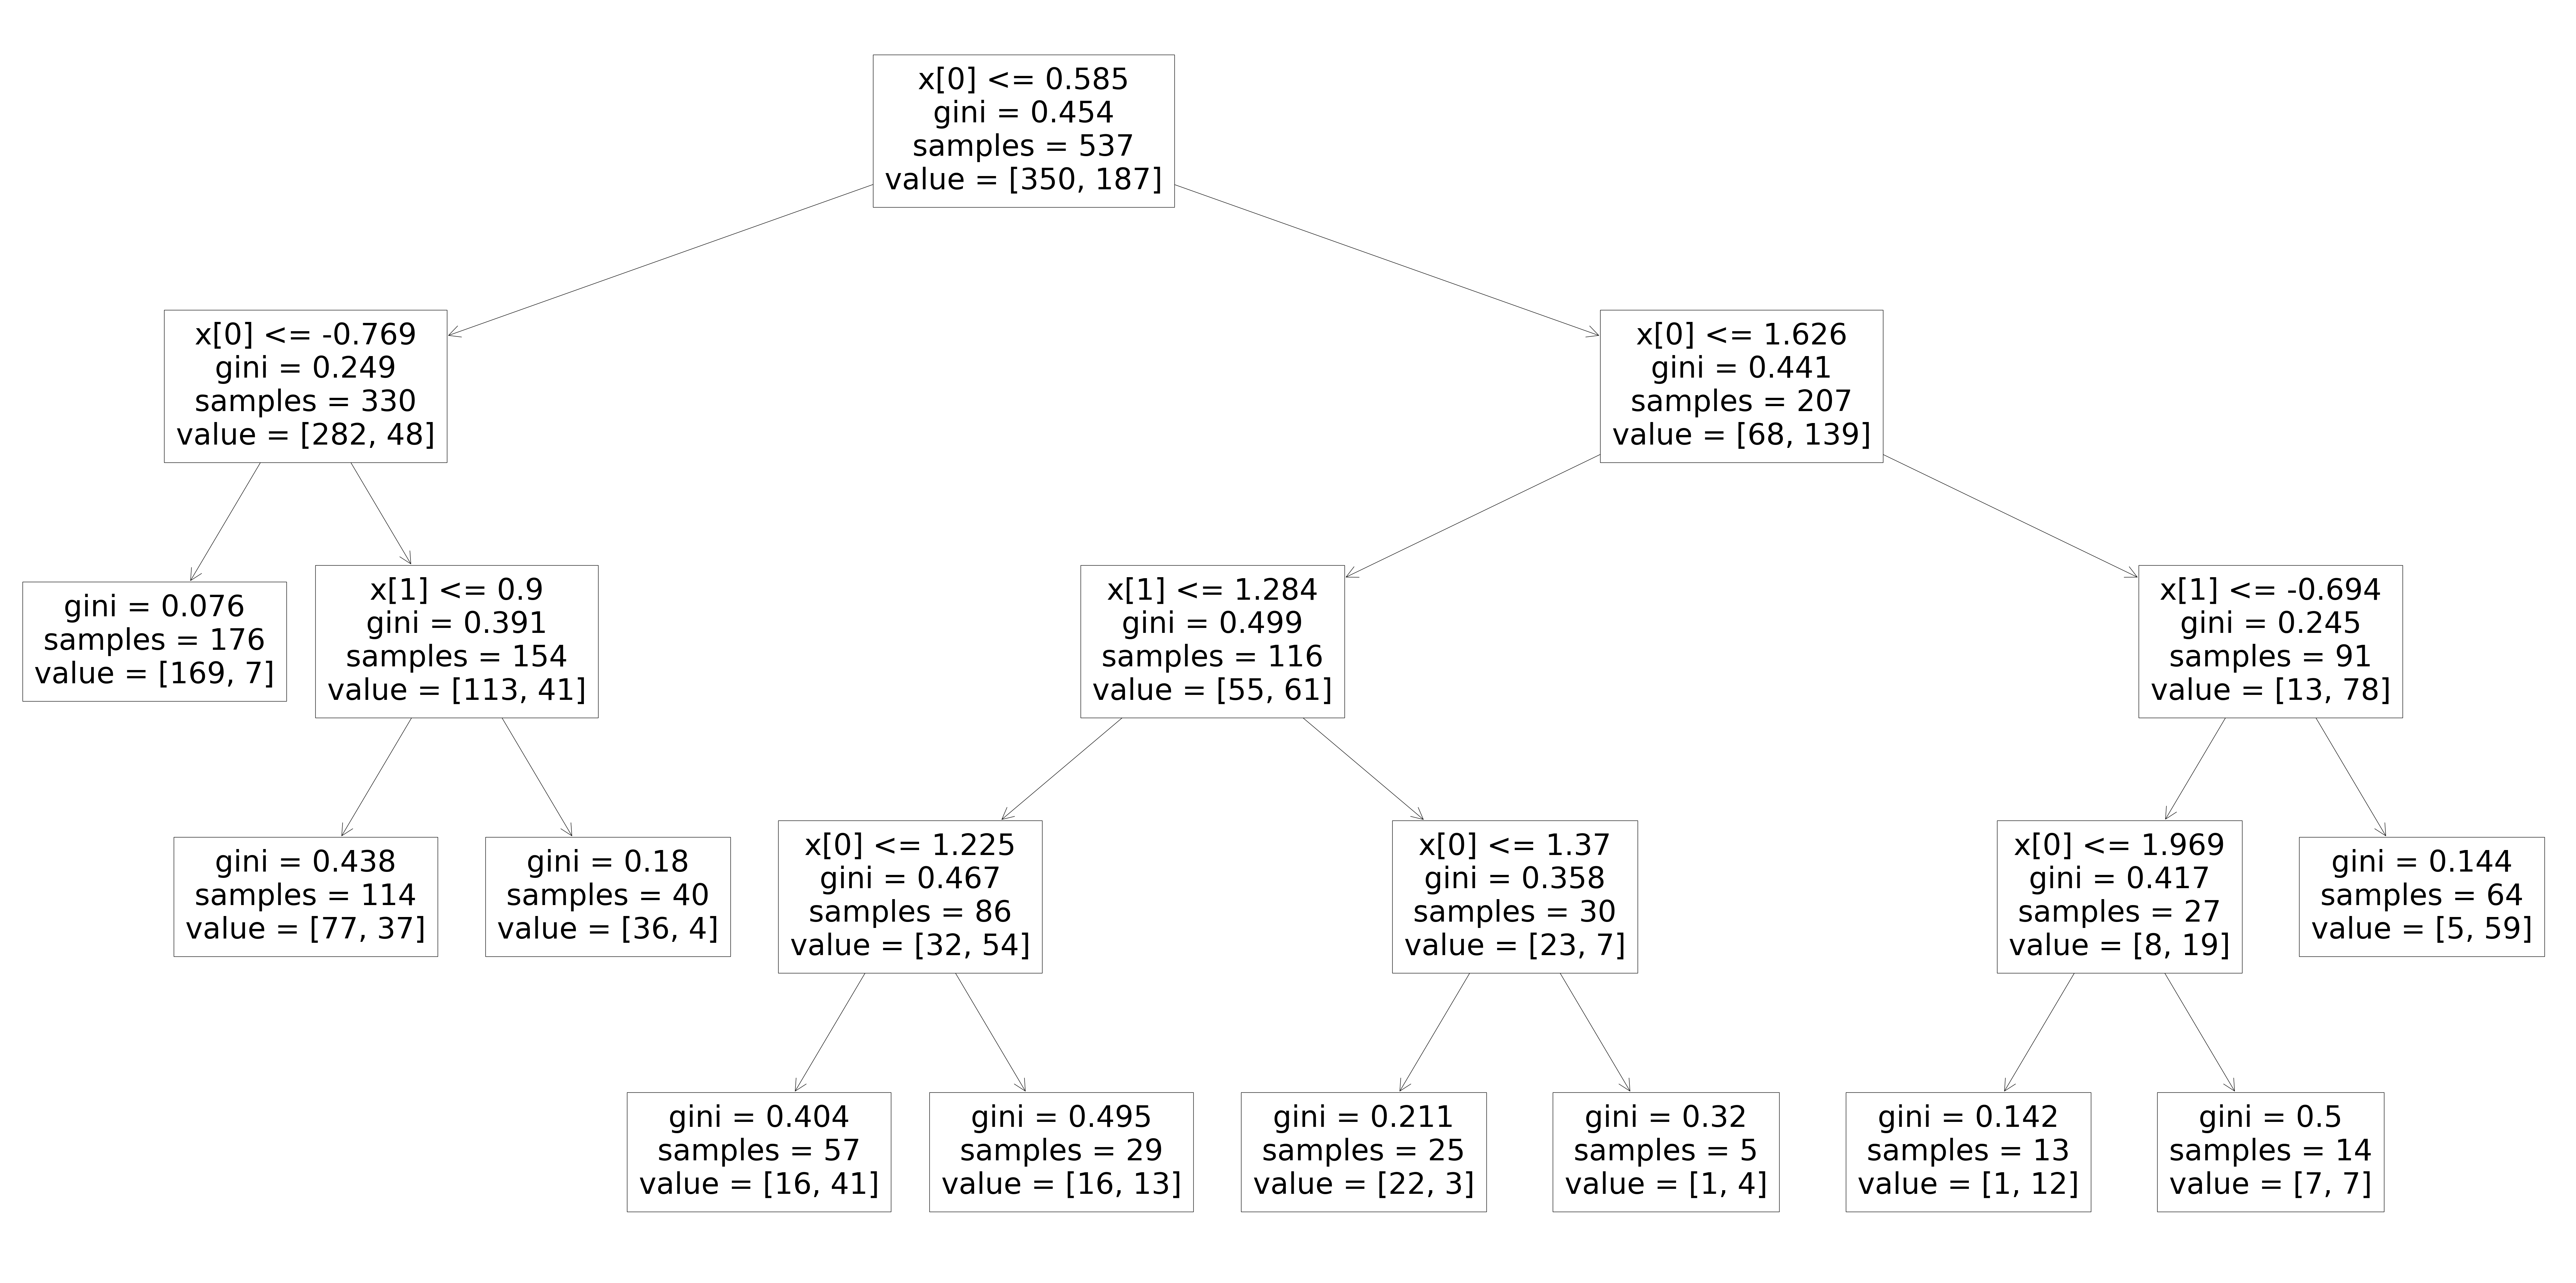

In [57]:

clf_pca = tree.DecisionTreeClassifier(max_depth=4, 
    min_samples_split=10, 
    min_samples_leaf=4,
    max_leaf_nodes=10
    )
clf_pca = clf_pca.fit(X_train_pca, y_train_pca)

plt.figure(figsize=(100,50))  # Figür boyutunu büyüt
tree.plot_tree(clf_pca)

PCA Karar Ağacı Accuracy: 0.7835497835497836
PCA Karar Ağacı Sensitivity: 0.6790123456790124
PCA Karar Ağacı Precision: 0.6962025316455697
PCA Karar Ağacı F1 Score: 0.6875000000000001
PCA Karar Ağacı Confusion Matrix:
 [[126  24]
 [ 26  55]]


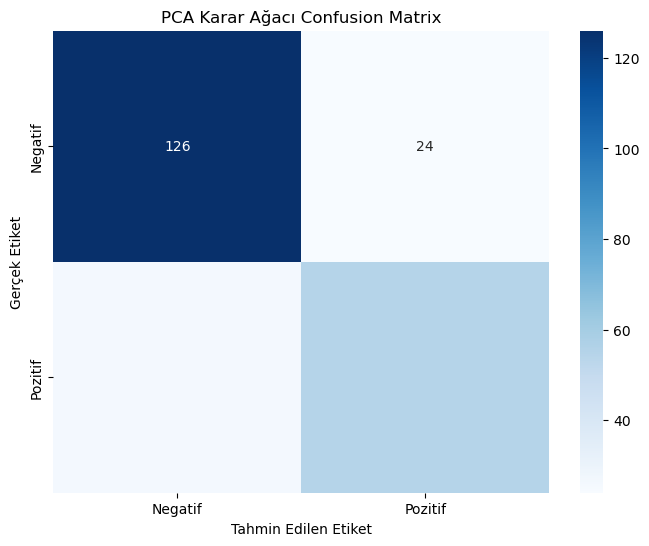

PCA Karar Ağacı ROC AUC: 0.8516049382716049


<Figure size 640x480 with 0 Axes>

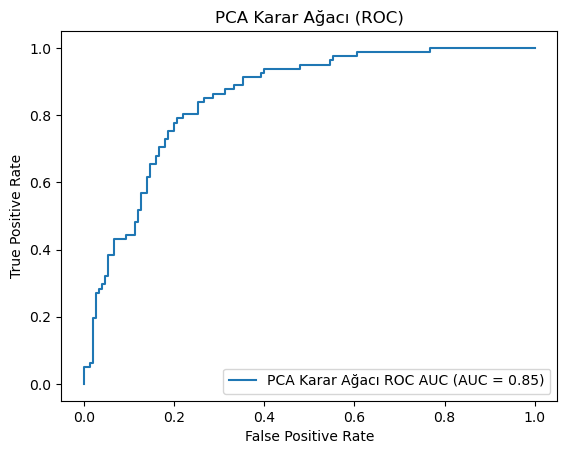

In [58]:

# Test seti üzerinde tahmin yapma
y_pred = clf_pca.predict(X_test_pca)


# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test_pca, y_pred_pca)
print("PCA Karar Ağacı Accuracy:", accuracy)

# Hassasiyet (Sensitivity) or Recall
sensitivity = recall_score(y_test_pca, y_pred_pca, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("PCA Karar Ağacı Sensitivity:", sensitivity)

# Kesinlik (Precision)
precision = precision_score(y_test_pca, y_pred_pca, pos_label=1)
print("PCA Karar Ağacı Precision:", precision)

# F1-Skor
f1 = f1_score(y_test_pca, y_pred_pca, pos_label=1)
print("PCA Karar Ağacı F1 Score:", f1)

# Özgüllük (Specificity)
# tn, fp, fn, tp = clf.ravel()
# specificity = tn / (tn + fp)
# print("Specificity:", specificity)


# Confusion Matrix hesaplama
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
print("PCA Karar Ağacı Confusion Matrix:\n", conf_matrix_pca)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('PCA Karar Ağacı Confusion Matrix')
plt.show()

######### ROC Eğrisi


# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores = clf_pca.predict_proba(X_test_pca)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test_pca, y_scores_pca)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("PCA Karar Ağacı ROC AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='PCA Karar Ağacı ROC AUC').plot()
plt.title('PCA Karar Ağacı (ROC)')
plt.show()

# NAIVE BAYES

Naive Bayes Accuracy: 0.8528138528138528
Naive Bayes Sensitivity: 0.8148148148148148
Naive Bayes Precision: 0.7764705882352941
Naive Bayes F1 Score: 0.7951807228915663
Naive Bayes Confusion Matrix:
 [[131  19]
 [ 15  66]]


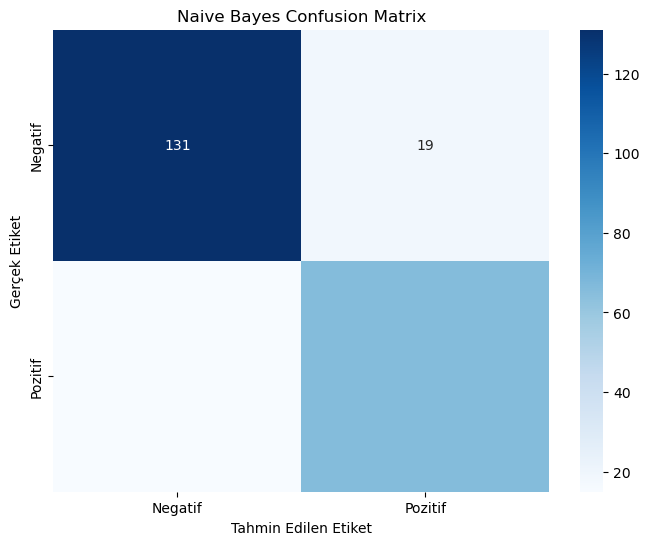

ROC AUC: 0.906954732510288


<Figure size 800x600 with 0 Axes>

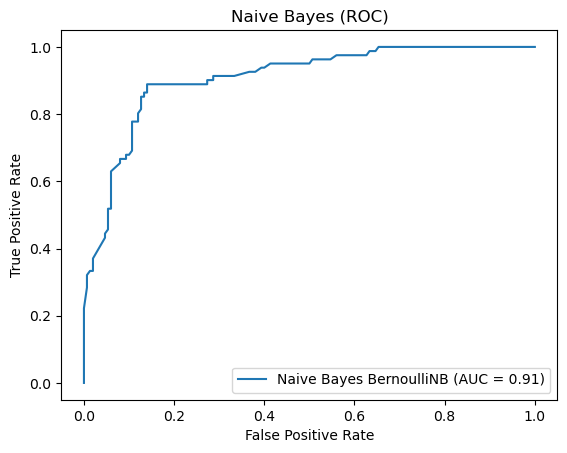

In [59]:
from sklearn.naive_bayes import BernoulliNB

# Bernoulli Naive Bayes modelini oluşturma ve eğitme
model = BernoulliNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)




# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Hassasiyet (Sensitivity) or Recall
sensitivity = recall_score(y_test, y_pred, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("Naive Bayes Sensitivity:", sensitivity)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred, pos_label=1)
print("Naive Bayes Precision:", precision)

# F1-Skor
f1 = f1_score(y_test, y_pred, pos_label=1)
print("Naive Bayes F1 Score:", f1)

# Özgüllük (Specificity)
# tn, fp, fn, tp = clf.ravel()
# specificity = tn / (tn + fp)
# print("Specificity:", specificity)


# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion Matrix:\n", conf_matrix)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Naive Bayes Confusion Matrix')
plt.show()



######### ROC Eğrisi
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes BernoulliNB').plot()
plt.title('Naive Bayes (ROC)')
plt.show()


# PCA NAIVE BAYES 

PCA Naive Bayes Accuracy: 0.7835497835497836
PCA Naive Bayes Sensitivity: 0.6790123456790124
PCA Naive Bayes Precision: 0.6962025316455697
PCA Naive Bayes F1 Score: 0.6875000000000001
PCA Naive Bayes Confusion Matrix:
 [[126  24]
 [ 26  55]]


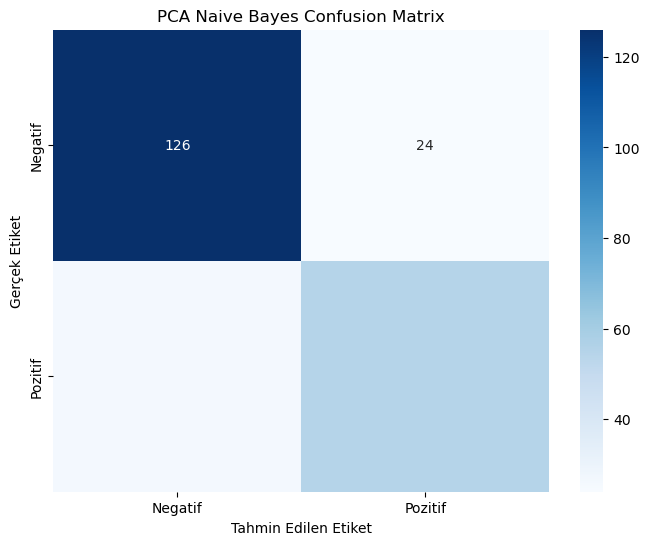

PCA Naive Bayes AUC: 0.8028395061728395


<Figure size 800x600 with 0 Axes>

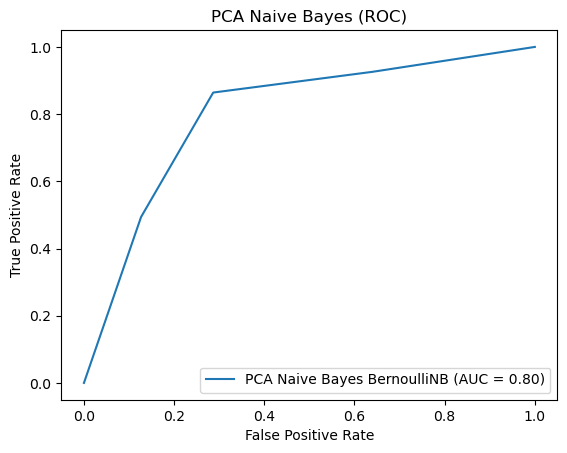

In [60]:

# Bernoulli Naive Bayes modelini oluşturma ve eğitme
model_pca = BernoulliNB()
model_pca.fit(X_train_pca, y_train_pca)

# Test seti üzerinde tahmin yapma
y_pred = model_pca.predict(X_test_pca)




# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test_pca, y_pred_pca)
print("PCA Naive Bayes Accuracy:", accuracy)

# Hassasiyet (Sensitivity) or Recall
sensitivity = recall_score(y_test_pca, y_pred_pca, pos_label=1)  # '1' pozitif sınıf olarak kabul edilir
print("PCA Naive Bayes Sensitivity:", sensitivity)

# Kesinlik (Precision)
precision = precision_score(y_test_pca, y_pred_pca, pos_label=1)
print("PCA Naive Bayes Precision:", precision)

# F1-Skor
f1 = f1_score(y_test_pca, y_pred_pca, pos_label=1)
print("PCA Naive Bayes F1 Score:", f1)

# Özgüllük (Specificity)
# tn, fp, fn, tp = clf.ravel()
# specificity = tn / (tn + fp)
# print("Specificity:", specificity)


# Confusion Matrix hesaplama
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
print("PCA Naive Bayes Confusion Matrix:\n", conf_matrix_pca)

# Confusion matrix çiz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt="d", cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('PCA Naive Bayes Confusion Matrix')
plt.show()



######### ROC Eğrisi

# Tahmin olasılıklarını al (pozitif sınıf için)
y_scores_pca = model_pca.predict_proba(X_test_pca)[:, 1]

# ROC eğrisi için TPR, FPR değerlerini hesaplama
fpr, tpr, thresholds = roc_curve(y_test_pca, y_scores_pca)

# AUC değerini hesaplama
roc_auc = auc(fpr, tpr)
print("PCA Naive Bayes AUC:", roc_auc)

# ROC Eğrisi çizimi
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='PCA Naive Bayes BernoulliNB').plot()
plt.title('PCA Naive Bayes (ROC)')
plt.show()